<a href="https://colab.research.google.com/github/syt73/python/blob/main/pythonbasic10_Machine_Learning_%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AI > ML > DL

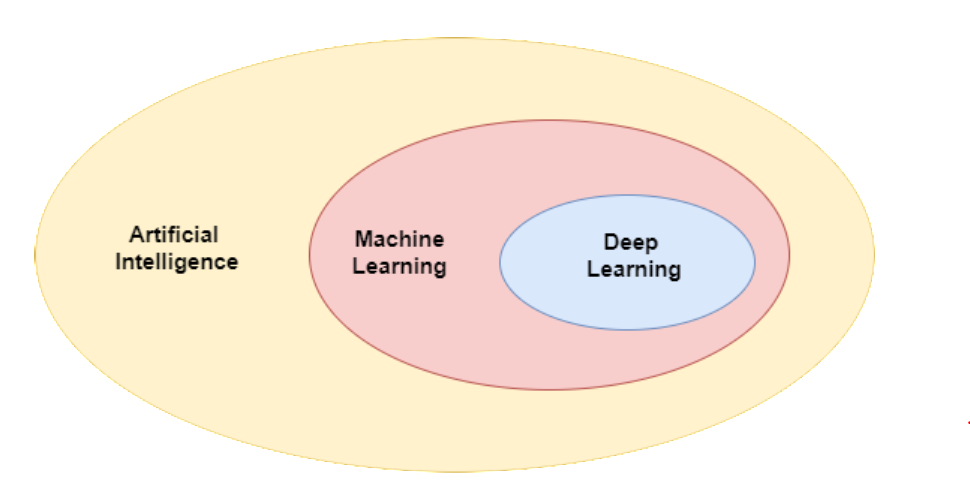

In [ ]:
# 지도학습 supervised learning 과 비지도학습 unsupervised learning ( + 강화학습)

# 지도학습 supervised learning - 문제와 정답을 함께 제시한다. 컴퓨터가 문제 학습을 통해서 정답을 찾는 모델을 만들어낸다.
# 비지도학습 unsupervised learning - 문제만 제시한다. 컴퓨터가 문제 학습을 통해서 정답을 찾는 모델을 만들어낸다.  

# 회귀 regression - 주가 예측, 코인 예측, 부동산 예측, 금값 예측 ....
# 분류 classification - 붓꽃 분류, 생존 분류, 손 글씨, 음악 분류 ....

In [ ]:
# 머신러닝 프로세스

# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 

# 4. 모 델   학 습 - 훈련용/검증용으로 데이터 분할, 알고리즘 선택, 모델링, 성능 평가, 하이퍼파라미터 튜닝
# 5.    예   측    - 학습한 모델에 새로운 데이터로 예측 



In [ ]:
# 붓꽃 분류

# 붓꽃의 세가지 종인 Versicolor, Virginica, Setosa 로 머신러닝을 통해 학습 후
# 분류해주는 모델을 만든다. 

In [ ]:
######################################################################
# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보 #
######################################################################

# 필수 모듈 임포트

import pandas as pd   # 데이터 분석 모듈
import numpy as np    # 데이터 계산 모듈

from sklearn import datasets  # 붓꽃 데이터셋 포함 모듈


In [ ]:
iris = datasets.load_iris()  # 붓꽃 데이터셋 읽어오기
iris.keys()                  # 붓꽃 데이터셋은 딕셔너리로 구성되어 있다. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 'DESCR' 데이터셋에 대한 전반적인 설명이 들어 있다. 
print(iris['DESCR'])

        # - sepal length in cm 꽃받침 길이
        # - sepal width in cm  꽃받침 너비
        # - petal length in cm 꽃잎 길이
        # - petal width in cm  꽃잎 너비

        # 150 (50 in each of three classes)  총 150개의 데이터로 구성되어 있고 3종 각각 50개씩
        # 3개의 종으로 구분된다. 
                # - Iris-Setosa       [0]
                # - Iris-Versicolour  [1]
                # - Iris-Virginica    [2]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print('데이터셋 내용 : \n', iris['target'])

# 150개의 데이터에 대한 클래스가 0,1,2 각각 50개씩 들어 있다. 
             # - Iris-Setosa       [0]
             # - Iris-Versicolour  [1]
             # - Iris-Virginica    [2]

print('데이터셋 크기 : ', iris['target'].shape)             

데이터셋 내용 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
데이터셋 크기 :  (150,)


In [ ]:
print('데이터셋 크기 : ', iris['data'].shape)
print('데이터셋 내용 : \n', iris['data'][:5,:])

# data 키를 사용하여 shape 속성으로 확인하면 150개의 행과 4개의 열로 구성된 2차원 데이터셋을 볼수 있다.
# 각 행은 수집된 꽃 샘플 데이터를 나타내고 각 열은 수집된 데이터의 구분 (속성)을 나타낸다. 
# 150개 붓꽃 에 대한 꽃받침의 길이와 너비 꽃잎의 길이와 너비를 측정하여 정리한 데이터이다.  

데이터셋 크기 :  (150, 4)
데이터셋 내용 : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
# 분석을 위해 데이터 프레임으로 전환

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 열 이름을 간단하게 변경

df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# target 도 데이터프레임에 추가

df['target'] = iris['target']
print('데이터셋의 크기 : ' ,df.shape)
print()
df.head()

데이터셋의 크기 :  (150, 5)



,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
###############################################################
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 # 
###############################################################

# 데이터 셋의 기본 정보 파악

df.info()

# info() 매서드는 데이터프레임의 기본 정보를 알려준다. 모든 열에 150개의
# 유효한 데이터가 있고 실수형과 정수형으로 구성되어있다. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# 데이터 셋의 통계 정보 파악

df.describe()

# describe() 매서드는 데이터셋의 각 열의 평균값 표준편차 최소값 최대값 등의
# 통계 정보를 요약하여 보여준다. 단, 숫자가 아닌 열은 계산에서 제외된다. 

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# 결측치 missing value (결측값) 확인

# 데이터프레임에 isnull() 메소드를 적용하면 각각 하나하나의 원소가 결측치인지
# 여부를 확인한다. 결측값이면 True 정상 데이터면 False 를 반환한다. 
# 여기에 sum() 적용하면 각열에서의 결측치의 개수를 계산하게 된다. 
# 결측치를 나타내는 True 가 숫자 1로 인식되므로 각 열의 숫자를 모두 더해주면
# sum함수의 출력값이 각 열의 결측값의 개수가 된다. 

df.isnull().sum()

# 결과로 5개의 열 모두 결측치가 없는 것을 확인할수 있다. 
# 결측치는 자료 수집, 정리 하는 과정에서 유효한 데이터가 없게 되는 경우이다. 
# 대부분의 머신러닝 알고리즘은 결측치가 있으면 오류가 발생된다. 따라서
# 결측치를 다른 유효한 값으로 대체하거나 삭제하는 전처리 과정이 중요하다. 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
# 상관 관계 분석

# corr() 매서드는 변수간의 상관계수를 출력한다. (영향을 미치는 정도)

df.corr()


,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


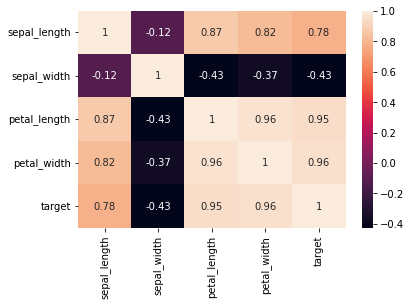

In [ ]:
# 상관관계 시각화

import matplotlib.pyplot as plt   # 기본 시각화 모듈
import seaborn as sns             # 확장 시각화 모듈

sns.heatmap(data=df.corr(), annot=True)


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

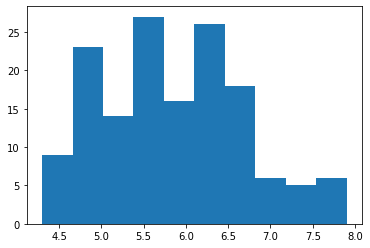

In [ ]:
plt.hist(x='sepal_length', data=df)

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

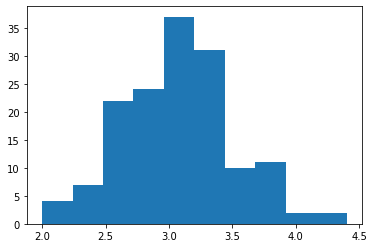

In [ ]:
plt.hist(x='sepal_width', data=df)

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

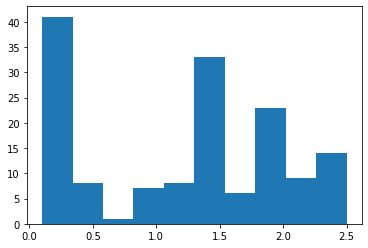

In [ ]:
plt.hist(x='petal_width', data=df)

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

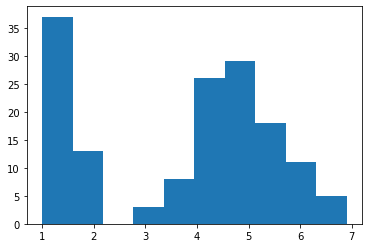

In [ ]:
plt.hist(x='petal_length', data=df)

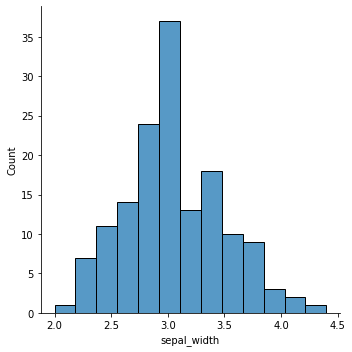

In [ ]:
# plt.hist(x='sepal_width', data=df)
sns.displot(x='sepal_width', data=df)

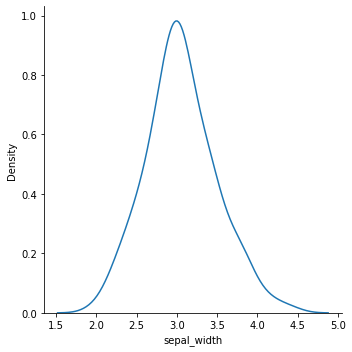

In [ ]:
sns.displot(x='sepal_width', data=df, kind='kde')   # 밀도 함수 그래프

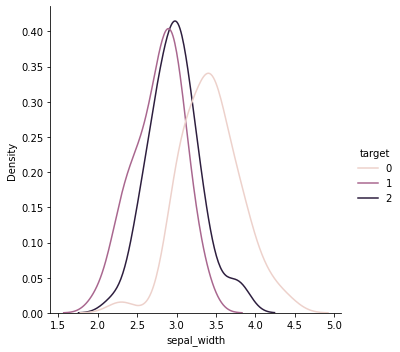

In [ ]:
sns.displot(x='sepal_width', data=df, kind='kde', hue='target')

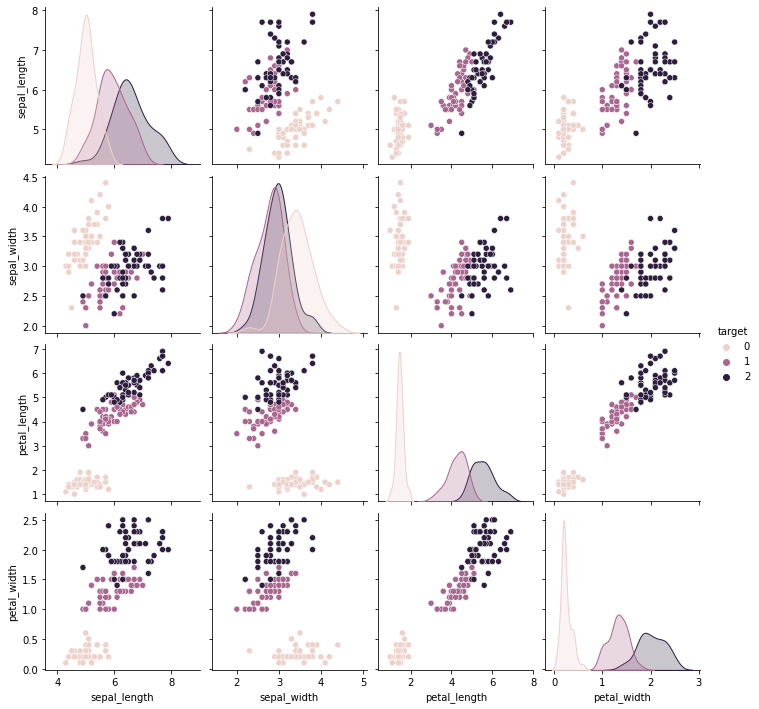

In [ ]:
# pairplot 서로 다른 피처 간의 관계를 나타내는 그래프를 한번에 그릴 수 있다. 
# 두 피처를 각각 x,y 축에 나타내어 상대적은 데이터 분포가 품종별롸 확연하게 구분된다. 
# 두 피처간의 관계에서 
# 1. 각 카테고리가 잘 분리 되어 있는지 확인
# 2. 두 개의 피처간의 상관 관계가 정확한 양의 또는 음의 형태를 보이고 있는지 여부 확인

sns.pairplot(df, hue='target')

In [ ]:
#####################################################################
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성#
#####################################################################

# 기존 데이터 셋을 훈련용과 검증용으로 데이터셋을 분할 (*****)

# 기존의 모든 데이터들로 모델을 생성하게 되면 그 모델의 적절성 여부를 확인할 
# 방법이 없다. 따라서 훈련용(80%)과 검증용(20%)으로 분리하여 훈련용 데이터로만
# 모델을 만들어 검증용(20%) 데이터 셋으로 확인하여 정확도를 측정할수 있고
# 모델을 개선 시킬수 있다. 

# 먼저 문제지(피처값)와 답안지(목표변수)를 분리한다. 

X_data = df.loc[:,'sepal_width':'petal_width']   # 문제지(피처값들)  X 대문자
y_data = df.loc[:,'target']                       # 답안지(목표변수)  y 소문자

# by 장서영
# X_data = df.iloc[:, [0,1,2,3]]   # 문제지 (피쳐값)
# y_data = df.iloc[:, [4]]         # 답안지 (목표변수)


In [ ]:
# !!! 아주 중요 !!!

from sklearn.model_selection import train_test_split # 훈련용 검증용 데이터 분할 모듈

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 20
                                                    )

In [ ]:
########################################################################
# 4. 모 델   학 습 - 훈련용/검증용으로 데이터 분할, 알고리즘 선택, 모델링#
########################################################################

# KNN - K Nearest Neighbors (K근접이웃)분류 알고리즘은 예측하려는 데이터가 주어지면 
#       기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다. 다시 말하면
#       분류할 데이터 를 둘러싼 K개의 가장 가까운 데이터를 찾고 그 이웃 데이터들이
#       가장 많이 속해있는 목표 클래스를 예측 값으로 결정한다.  

#       가까운 이웃을 k=3으로 설정하면 Class B에 속하는 데이터가 2개로 가장 많다. 
#       그러나 k=6으로 설정하면 Class A에 속하는 데이터가 4개로 가장 많다.
#       따라서 K값에 따라 KNN 모델이 예측하는 결과가 달라질 수 있다. 
#       K값에 따라 예측력이 달라지므로 적정한  K값을 설정해야 한다. 


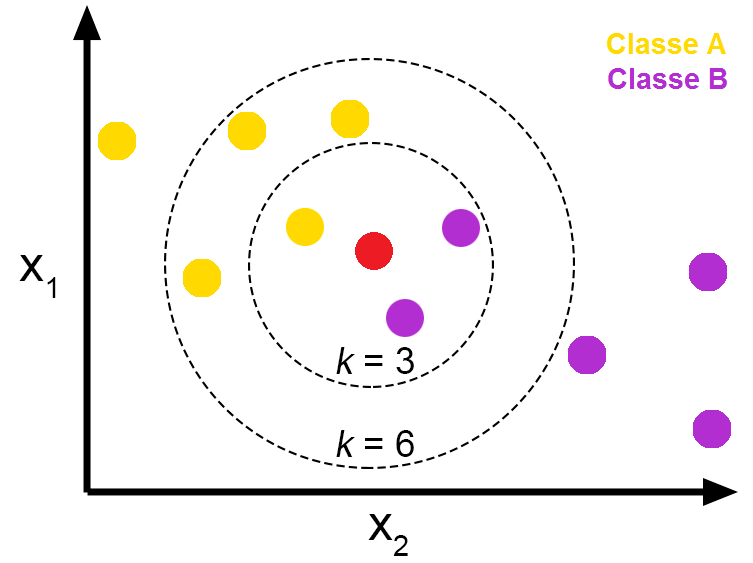

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)

from sklearn.neighbors import KNeighborsClassifier   # KNN 모듈 읽어오기
knn = KNeighborsClassifier(n_neighbors=20)            # knn 객체 생성하기(k 값 설정)
knn.fit(X_train, y_train)  # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

knn_pred = knn.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
knn_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, knn_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

# n_neighbors=3     0.9333333333333333
# n_neighbors=6     0.9333333333333333
# n_neighbors=10    0.9333333333333333
# n_neighbors=20    0.9666666666666667   ->    1.0  'sepal_width':'petal_width' 
# n_neighbors=50    0.9333333333333333

1.0

In [ ]:
# SVM (Support Vector Machine) - 모든 데이터를 벡터 공간내의 좌표에 점으로 표시하고 
#     각 데이터가 속하는 클래스별로 군집을 이룬다고 가정한다.
#     이때 각 군집까지의 거리를 최대한 멀리 유지하는 경계선을 찾아 각 군집을 서로
#     확연하게 구분할수 있게 한다. 이렇게 각 군집을 구분하는 경계선을 찾아 새로운 
#     데이터가 주어졌을때 백터 공간의 좌표에서 어느 군집에 속하는 지 분류할 수 있다. 


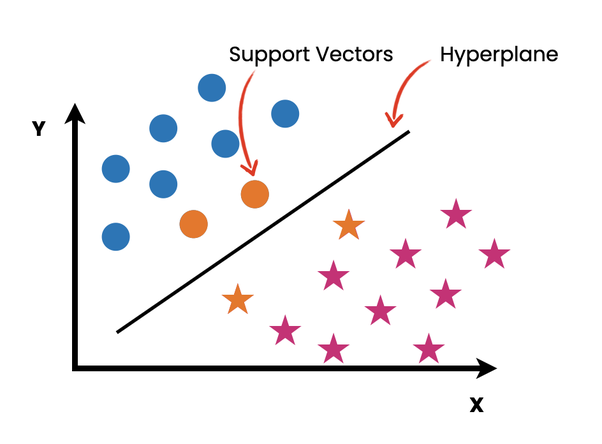

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.svm import SVC  # SVM 모듈 읽어오기
svc = SVC(kernel='rbf')      # svm 객체 생성하기, 언제나 rbf
svc.fit(X_train, y_train)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

svc_pred = svc.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
svc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, svc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가


1.0

In [ ]:
# Decision Tree DT 의사 결정 나무

# DT 모델은 트리 알고리즘을 사용한다. 트리의 각 분기점(node) 에 데이터셋의
# 피처(열값)을 하나씩 위치시킨다. 각 분기점에서 해당 피처에 대한 임의의 조건식을
# 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분하게 된다. 각 분기점에서
# 분류가 가장 잘되는 최적의 기준을 찾는 과정이 매우 중요하다. 


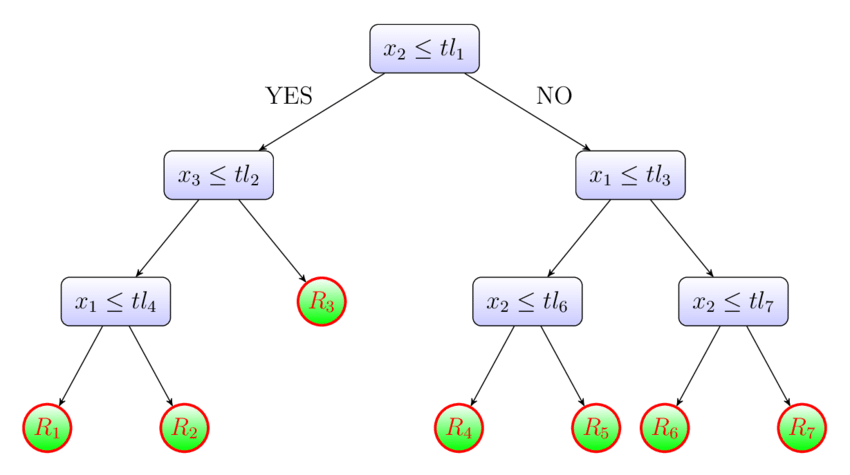

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.tree import DecisionTreeClassifier                # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth = 6, random_state = 10) # dtc 객체 생성하기, 
dtc.fit(X_train, y_train)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

dtc_pred = dtc.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, dtc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

# max_depth = 1    0.6333333333333333
# max_depth = 2    0.9
# max_depth = 3    0.9333333333333333

0.9333333333333333

In [ ]:
# 앙상블 모델 ensemble model - Voting

# 앙상블 모델은 여러 모델을 결합하여 성능을 높이는 방법이다. 하나의 모델 예측에 
# 의존하는 것보다. 여러 모델의 예측을 종합하면 예측력이 일반적으로 더 좋아진다. 
# 여러 개의 모델이 예측한 값을 결합하여 최종 예측을 결정하는 방법 중 하나가 Voting 이다. 

# knn -> 1    svm -> 1      dtc -> 2        최종 예측 값은 1로 결정한다. 

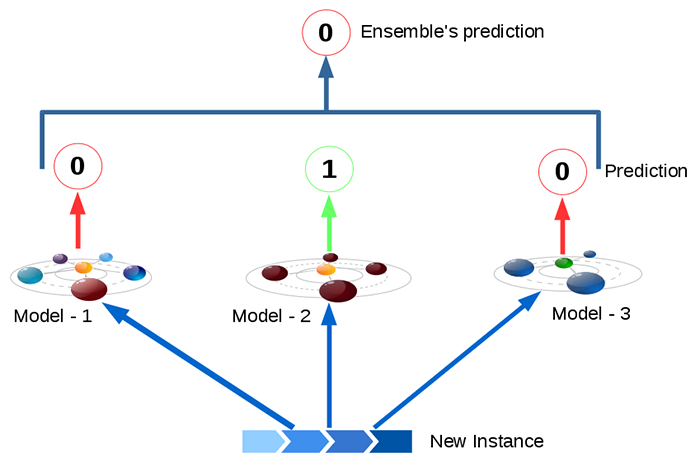

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.ensemble import VotingClassifier                # Voting 모듈 읽어오기
evc = VotingClassifier(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],
                       voting='hard')  # evc 객체 생성하기, 
                       # 사용할 알고리즘 들 을 선정하고 voting='hard' 투표, 
                       # voting='soft' 확률의 평균을 계산하여 최종 분류한다. 
evc.fit(X_train, y_train)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

evc_pred = evc.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
evc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, evc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

1.0

In [ ]:
# 앙상블 모델 ensemble model - Bagging

# 여러 알고리즘을 종합하여 활용하는 Voting 과는 달리
# Bagging은 같은 종류의 알고리즘을 여러개 결합하여 예측하는 방법이다.  

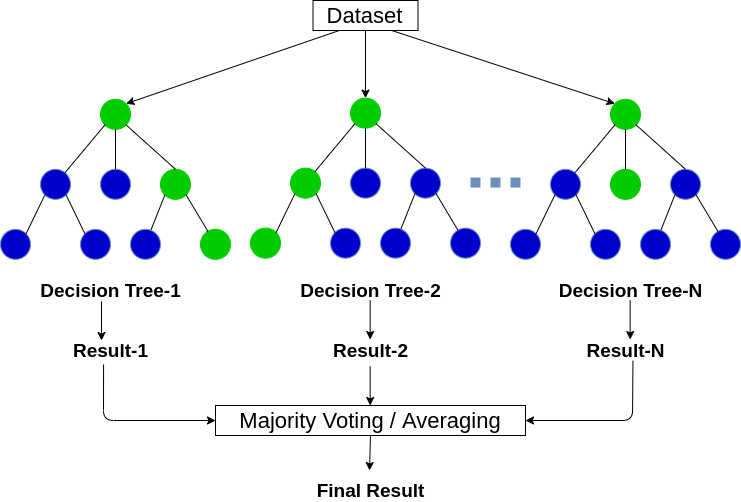

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from sklearn.ensemble import RandomForestClassifier  # RFC 모듈 읽어오기
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=10) 
        # rfc 객체 생성하기, n_estimators=각 나무의 개수, max_depth=각 나무의 깊이
rfc.fit(X_train, y_train)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

rfc_pred = rfc.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
rfc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, rfc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

# n_estimators=30, max_depth=3     0.9



0.9

In [ ]:
# 앙상블 모델 ensemble model - Boosting  (*****)

# Boosting 은 캐글, 데이콘 등 경진 대회에서 가장 많이 사용되는 알고리즘이다. 
# 모델 학습 속도도 빠르고 예측력도 상당히 좋다. 

# 여러개의 가벼운 모델을 순차적(***)으로 학습한다. 
# 잘못 예측한 데이터에 대한 예측 오차를 줄일 수 있는 방향으로 모델을 계속 업데이트한다. 
# 여러 모델을 동시에 학습하지 않고 순서대로(***) 학습한다는 점에서 배깅과 다르다. 

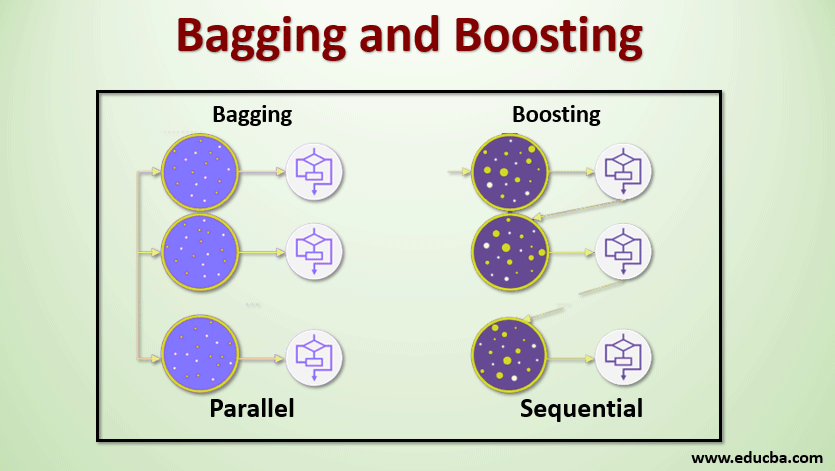

In [ ]:
# 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
from xgboost import XGBClassifier  # xgbc 모듈 읽어오기
xgbc = XGBClassifier(n_estimators=50, max_depth=20, random_state=20) 
        # xgbc 객체 생성하기, n_estimators=각 나무의 개수, max_depth=각 나무의 깊이
xgbc.fit(X_train, y_train)    # 훈련용 문제와 훈련용 답안지로 학습하여 모델 생성

# 예측 (시험)

xgbc_pred = xgbc.predict(X_test)   # 검증용 문제지만 제시  y_test 답안지는 미제공
xgbc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score # 평가 모듈 읽어오기
accuracy_score(y_test, xgbc_pred)           # 예측 결과와 실제 결과 데이터 비교후 정확도 평가

# n_estimators=100, max_depth=8     0.9

0.9

In [ ]:
# K-fold

# 과대적합 over fitting 과 과소적합 under fitting 문제들을 쉽게 해결할수 있는 방법
# 한정된 데이터의 수를 마치 늘린 것처럼 사용하는 방법 (10개의 데이터를 50개 처럼)



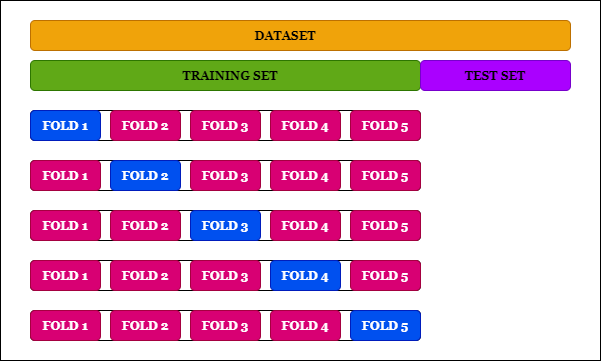

In [ ]:
from sklearn.model_selection import KFold                 #KFold 모듈 읽어오기

kfold = KFold(n_splits=5, shuffle=True, random_state=20)  #kfold 객체 생성

num_fold = 1

for tr_idx, val_idx in kfold.split(X_train):
  print(f'{num_fold} Fold ----------------------------------------')
  print(f'훈련 : {len(tr_idx)} {tr_idx[:10]}')
  print(f'검증 : {len(val_idx)} {val_idx[:10]}')
  num_fold += 1


1 Fold ----------------------------------------
훈련 : 96 [ 0  3  4  6  7  8  9 10 11 12]
검증 : 24 [ 1  2  5 35 37 38 44 49 50 51]
2 Fold ----------------------------------------
훈련 : 96 [ 1  2  3  4  5  6  7  8  9 10]
검증 : 24 [ 0 12 19 21 23 31 36 39 46 47]
3 Fold ----------------------------------------
훈련 : 96 [ 0  1  2  3  5  6  7  9 10 12]
검증 : 24 [ 4  8 11 14 24 27 29 30 33 41]
4 Fold ----------------------------------------
훈련 : 96 [ 0  1  2  4  5  6  7  8  9 11]
검증 : 24 [ 3 10 13 17 18 25 32 43 57 58]
5 Fold ----------------------------------------
훈련 : 96 [ 0  1  2  3  4  5  8 10 11 12]
검증 : 24 [ 6  7  9 15 16 20 22 26 28 34]


In [ ]:
val_scores = []  # 각각의 정확도를 담을 리스트
num_fold = 1

for tr_idx, val_idx in kfold.split(X_train):
  # 실제 데이터 추출 (각각의 폴드마다의 훈련용과 검증용 실 데이터 추출)
  X_tr, X_val = X_train.iloc[tr_idx,:],X_train.iloc[val_idx,:]    # 훈련용 문제지 / 검증용 문제지
  y_tr, y_val = y_train.iloc[tr_idx],y_train.iloc[val_idx]    # 훈련용 답안지 / 검증용 답안지

  # 모델 학습 (지도학습 : 문제와 정답을 함께 제시)
  rfc = RandomForestClassifier(max_depth=5, random_state=20)
  rfc.fit(X_tr, y_tr)  # 훈련용 문제지와 훈련용 답안지로 학습

  # 예측 (시험)
  y_val_pred = rfc.predict(X_val)  # 검증용 문제지만 제시

  # 평가
  val_acc = accuracy_score(y_val, y_val_pred)   # 정답지와 비교하여 채점
  print(f'{num_fold} Fold Accuracy : {val_acc}')
  val_scores.append(val_acc)
  num_fold += 1


1 Fold Accuracy : 0.9166666666666666
2 Fold Accuracy : 1.0
3 Fold Accuracy : 0.9583333333333334
4 Fold Accuracy : 1.0
5 Fold Accuracy : 1.0


In [ ]:
# 평균 정확도

import numpy as np
mean_score = np.mean(val_scores)
print(f'평균 검증 정확도 : {mean_score}')


평균 검증 정확도 : 0.975
